# Mineração de Imagens - Extração de Embeddings a partir de Imagens - Modelos DNN Pré-Treinados



In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

# Carregando modelo pré-treinado (ResNet18)



He, Kaiming, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. "Deep residual learning for image recognition." In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 770-778. 2016.



**Estou usando a ResNet18. Outras opções de modelos pré-treinados estão listadas abaixo.**

OBS: Se for trocar o modelo, precisa pesquisar a dimensão da imagem em que o modelo foi treinado.

https://pytorch.org/vision/stable/models.html
```
* resnet18 = models.resnet18(pretrained=True)
* alexnet = models.alexnet(pretrained=True)
* squeezenet = models.squeezenet1_0(pretrained=True)
* vgg16 = models.vgg16(pretrained=True)
* densenet = models.densenet161(pretrained=True)
* inception = models.inception_v3(pretrained=True)
* googlenet = models.googlenet(pretrained=True)
* shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
* mobilenet_v2 = models.mobilenet_v2(pretrained=True)
* mobilenet_v3_large = models.mobilenet_v3_large(pretrained=True)
* mobilenet_v3_small = models.mobilenet_v3_small(pretrained=True)
* resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
* wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
* mnasnet = models.mnasnet1_0(pretrained=True)
```



In [ ]:
model = models.resnet18(pretrained=True)

layer = model._modules.get('avgpool')
model.eval() # coloca a rede em model eval() para desativar as dropout layers (sao uteis durante o treinamento apenas)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 42.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Transformação das Imagens
ResNet utiliza imagens com 224x224 pixels. Imagens fora dessa dimensão são automaticamente ajustadas.

In [ ]:
scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

# Gerando Embeddings

In [ ]:
import numpy as np

def gerar_embeddings(arquivo_imagem):

    img = Image.open(arquivo_imagem)
    img_transformada = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))

    embedding = torch.zeros(512) # armazenado espaço

    def capturar_embedding(m, i, o):
        embedding.copy_(o.data.reshape(o.data.size(1)))

    # capturando embeddings
    h = layer.register_forward_hook(capturar_embedding)
    model(img_transformada)

    h.remove()

    return np.array(embedding)

# Testes

Testando similaridade entre gatos e cachorro.

Usamos a *dissimilaridade de cosseno* (quanto menor, mais próximas são as imagens)

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/1-month-old_kittens_32.jpg/1200px-1-month-old_kittens_32.jpg -O gato1.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/A_focused_kitten_%28Flickr%29.jpg/1200px-A_focused_kitten_%28Flickr%29.jpg -O gato2.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/An_Indian_Spitz_Dog_with_pointy_ears_and_conical_snout_2021.jpg/800px-An_Indian_Spitz_Dog_with_pointy_ears_and_conical_snout_2021.jpg -O cachorro1.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Female_house_sparrow_at_Kodai.jpg/1280px-Female_house_sparrow_at_Kodai.jpg -O passarinho.jpg


--2024-10-11 11:49:15--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/1-month-old_kittens_32.jpg/1200px-1-month-old_kittens_32.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120827 (118K) [image/jpeg]
Saving to: ‘gato1.jpg’

gato1.jpg           100%[===================>] 118.00K  --.-KB/s    in 0.1s    

2024-10-11 11:49:15 (1005 KB/s) - ‘gato1.jpg’ saved [120827/120827]

--2024-10-11 11:49:15--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/A_focused_kitten_%28Flickr%29.jpg/1200px-A_focused_kitten_%28Flickr%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169540 (166K) [

In [ ]:
gato1_embedding = gerar_embeddings('gato1.jpg')
gato2_embedding = gerar_embeddings('gato2.jpg')
cachorro1_embedding = gerar_embeddings('cachorro1.jpg')
passarinho_embedding = gerar_embeddings('passarinho.jpg')

In [ ]:
gato1_embedding

array([8.58317316e-02, 9.76915836e-01, 1.34170210e+00, 9.81877089e-01,
       5.78188300e-02, 9.39697698e-02, 6.22204654e-02, 2.76855454e-02,
       1.04992306e+00, 1.66191369e-01, 2.83975053e+00, 1.58130944e+00,
       1.38934541e+00, 1.31008059e-01, 6.73353076e-01, 2.25847006e-01,
       5.30361459e-02, 1.25590551e+00, 1.32928163e-01, 4.83079523e-01,
       7.19930291e-01, 1.28482831e+00, 6.71250641e-01, 1.40715504e+00,
       1.91473469e-01, 1.07384551e+00, 8.59304309e-01, 1.31087410e+00,
       4.42067564e-01, 3.59444410e-01, 1.32438183e-01, 2.16043681e-01,
       8.12865496e-01, 1.13453465e-02, 2.11374536e-01, 2.98306674e-01,
       5.12478411e-01, 1.88896745e-01, 6.32358611e-01, 1.64388800e+00,
       2.20958218e-01, 1.44518077e-01, 2.02585667e-01, 4.40122366e-01,
       6.93994045e-01, 2.75460541e-01, 2.05279040e+00, 1.95258939e+00,
       7.89276898e-01, 1.11580920e+00, 1.22718960e-01, 9.29974079e-01,
       5.91395915e-01, 2.39081964e-01, 1.35993302e+00, 3.79980385e-01,
      

In [ ]:
gato1_embedding.shape

(512,)

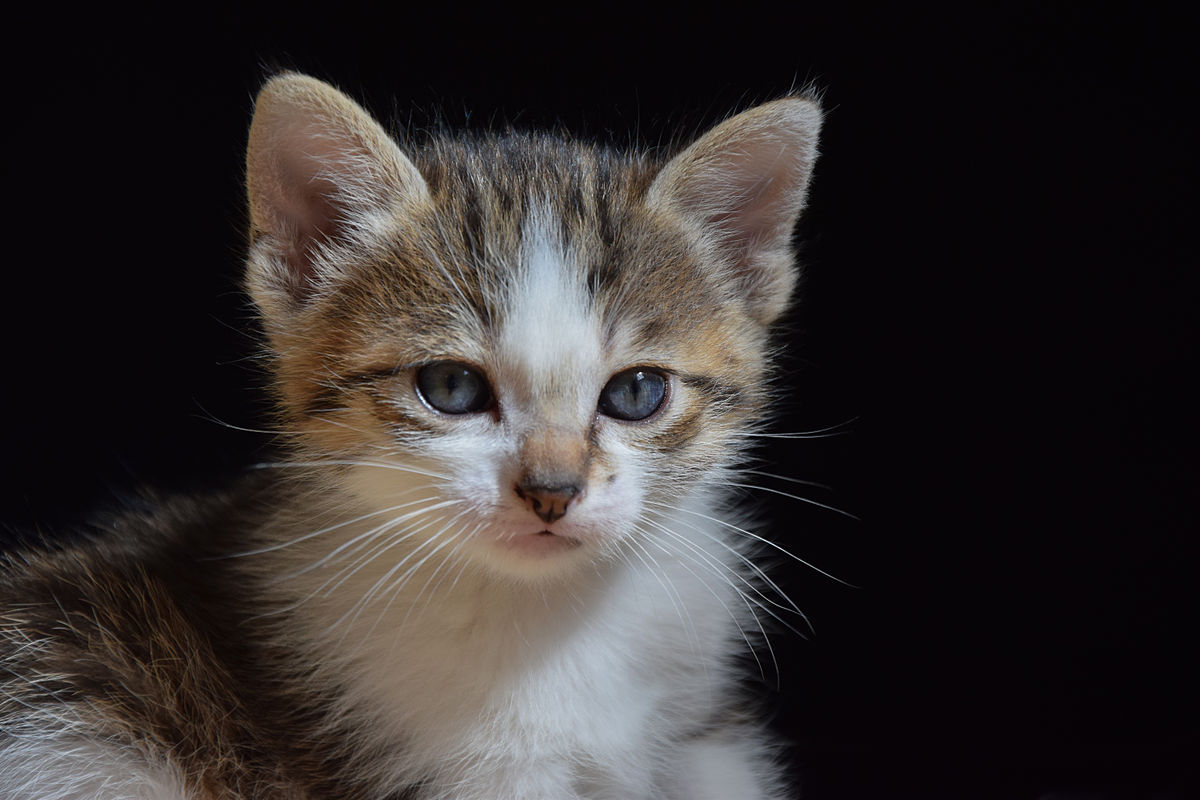

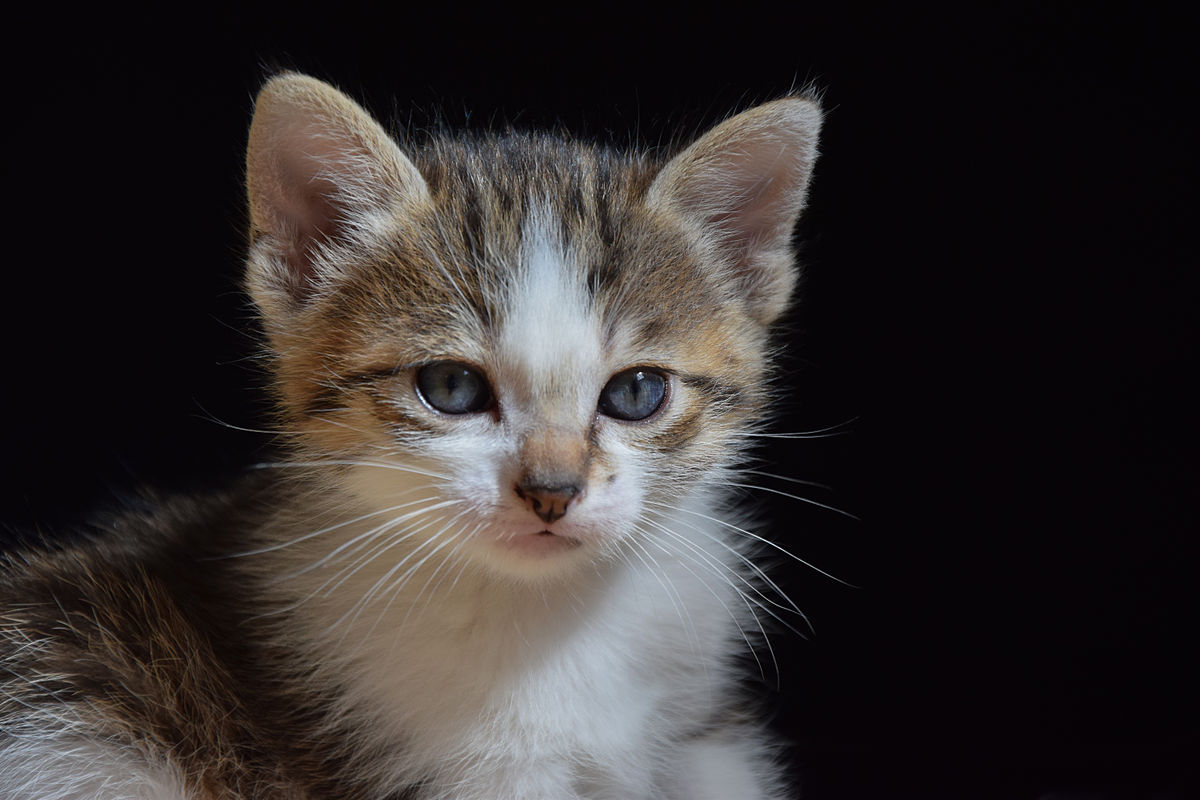

Dissimilaridade de Cosseno:  1.9638438319979912e-08


In [ ]:
from IPython.display import Image
from IPython.display import display
from scipy.spatial import distance

x = Image(filename='gato1.jpg',width=224)
y = Image(filename='gato1.jpg',width=224)
display(x, y)

d_cos = distance.cosine(gato1_embedding, gato1_embedding) # dissimilaridade de cosseno
print('Dissimilaridade de Cosseno: ',d_cos)

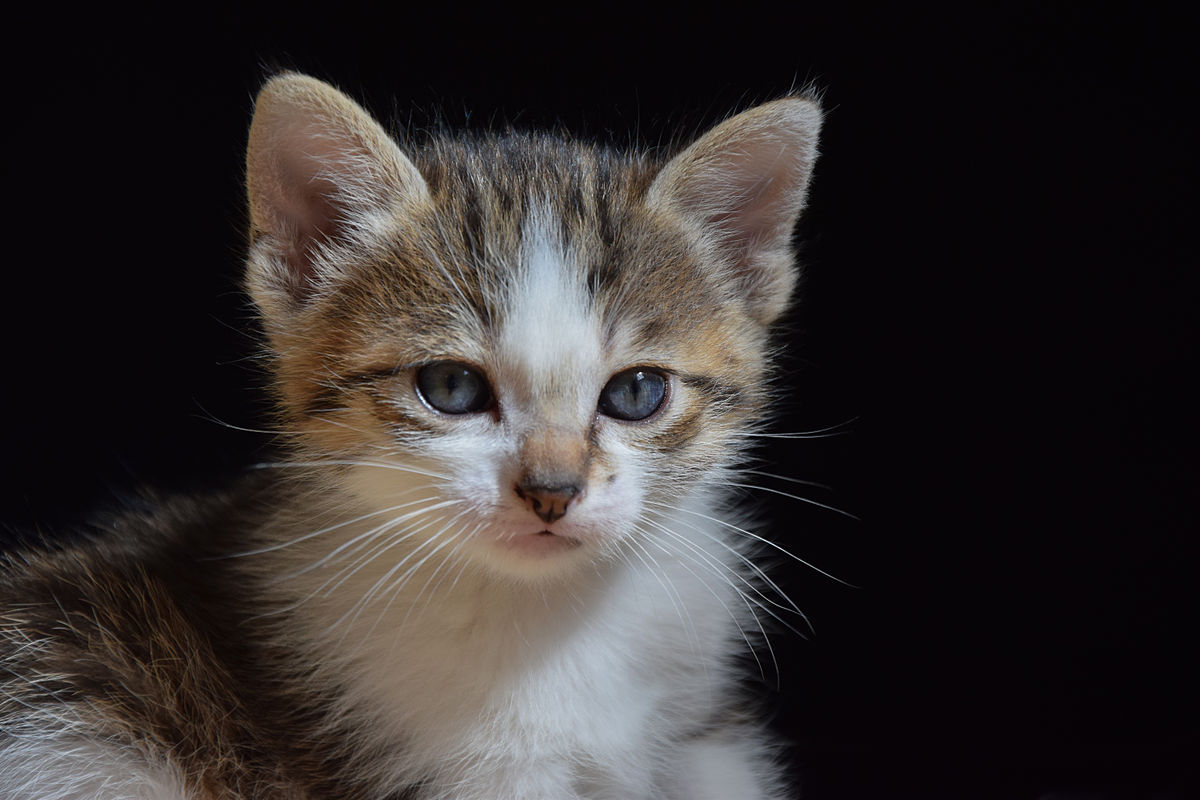

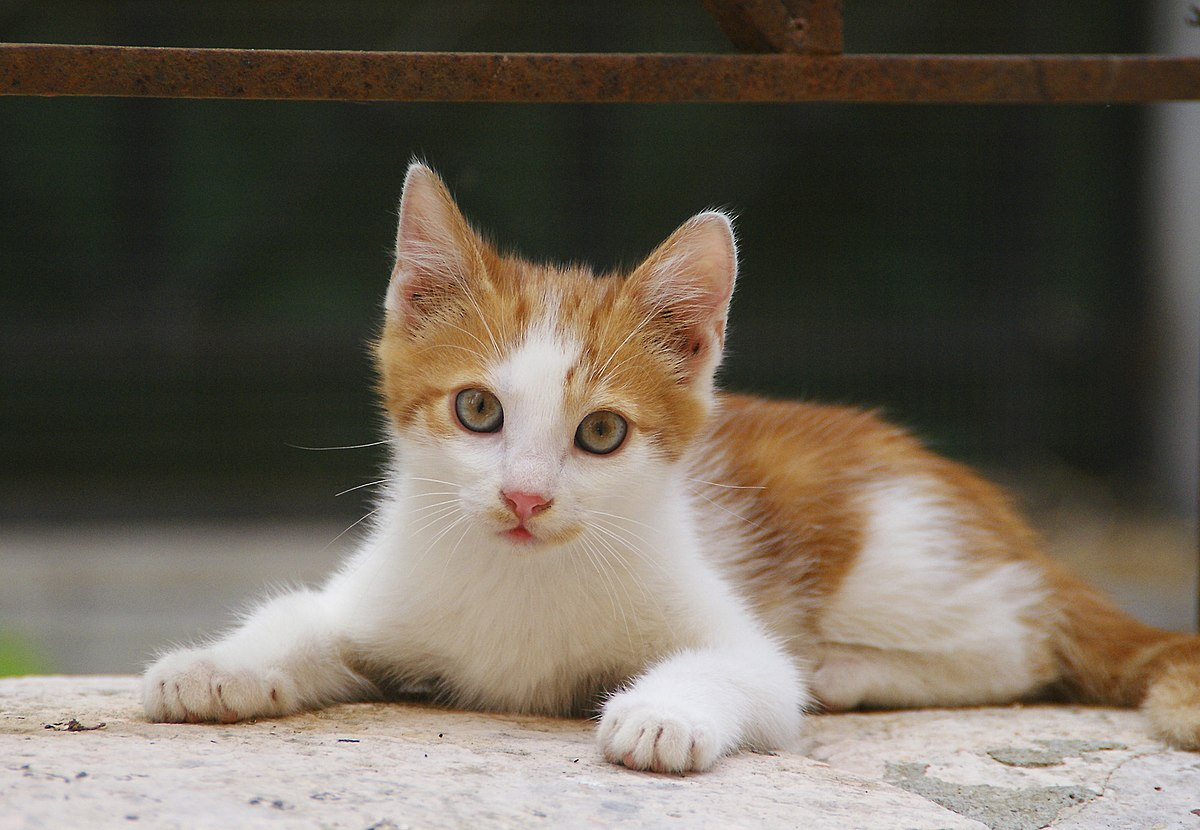

Dissimilaridade de Cosseno:  0.16125971060323463


In [ ]:
x = Image(filename='gato1.jpg',width=224)
y = Image(filename='gato2.jpg',width=224)
display(x, y)

d_cos = distance.cosine(gato1_embedding, gato2_embedding) # dissimilaridade de cosseno
print('Dissimilaridade de Cosseno: ',d_cos)

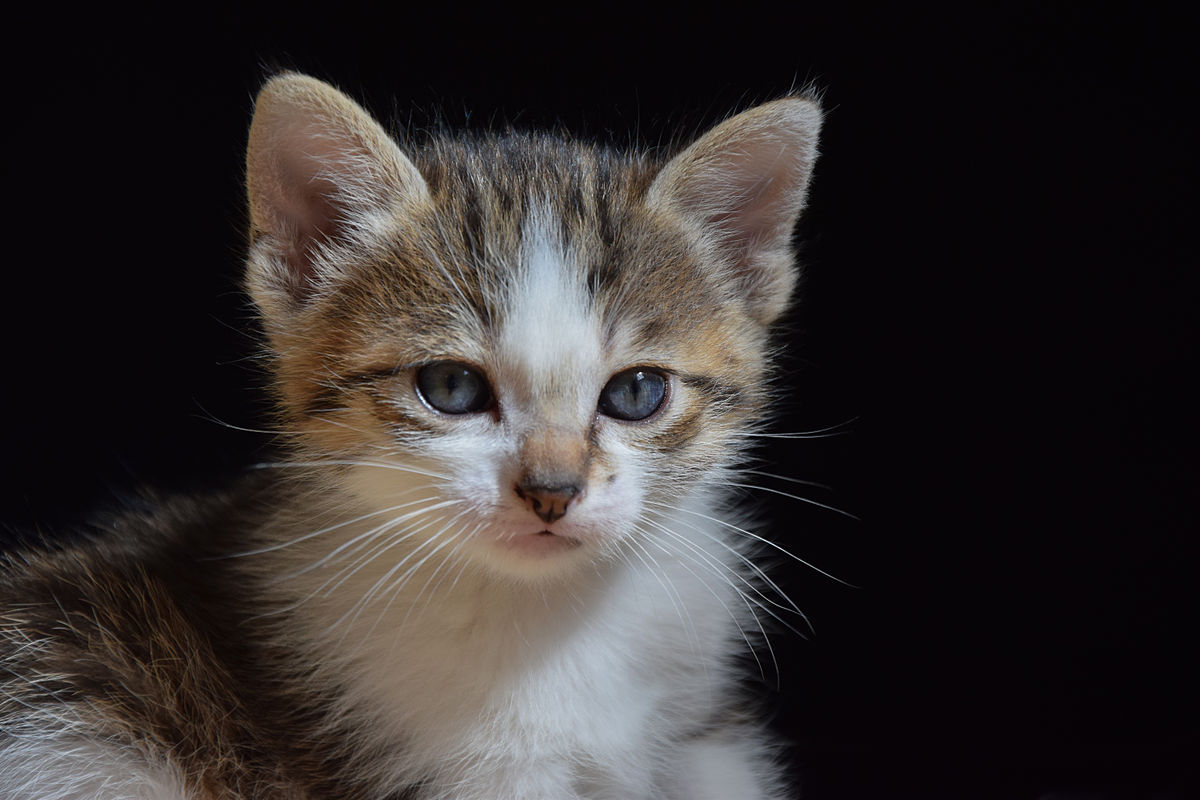

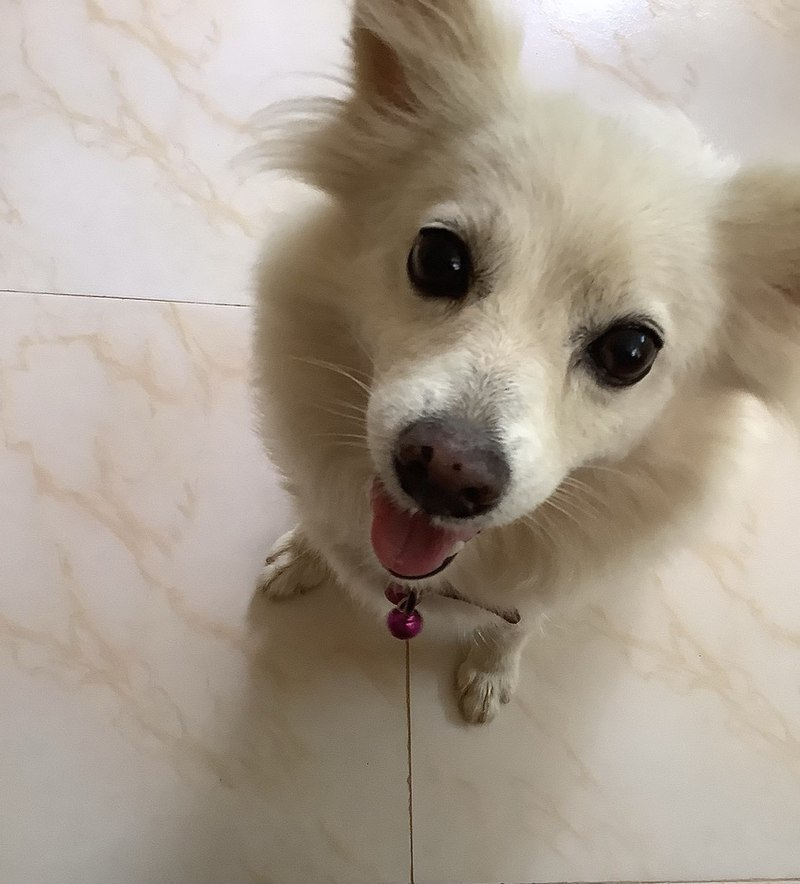

Dissimilaridade de Cosseno:  0.38032145391324235


In [ ]:
x = Image(filename='gato1.jpg',width=224)
y = Image(filename='cachorro1.jpg',width=224)
display(x, y)

d_cos = distance.cosine(gato1_embedding, cachorro1_embedding) # dissimilaridade de cosseno
print('Dissimilaridade de Cosseno: ',d_cos)

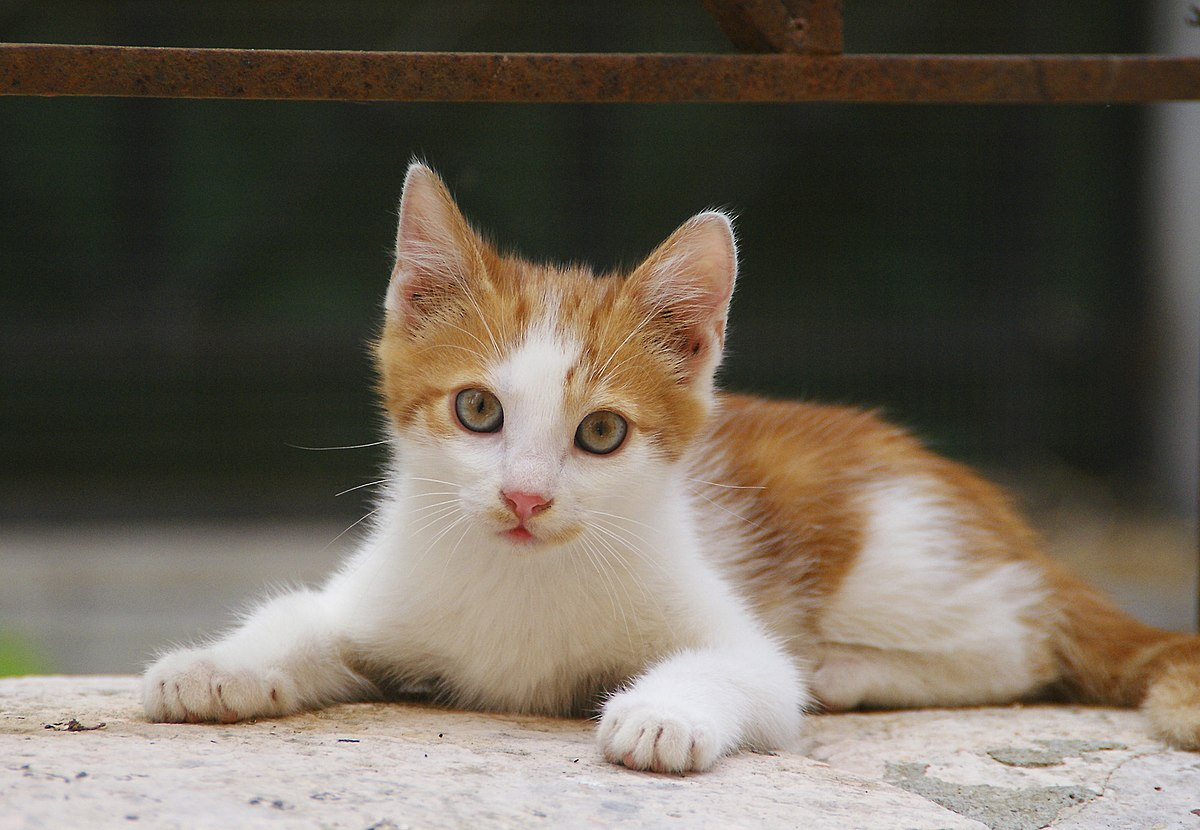

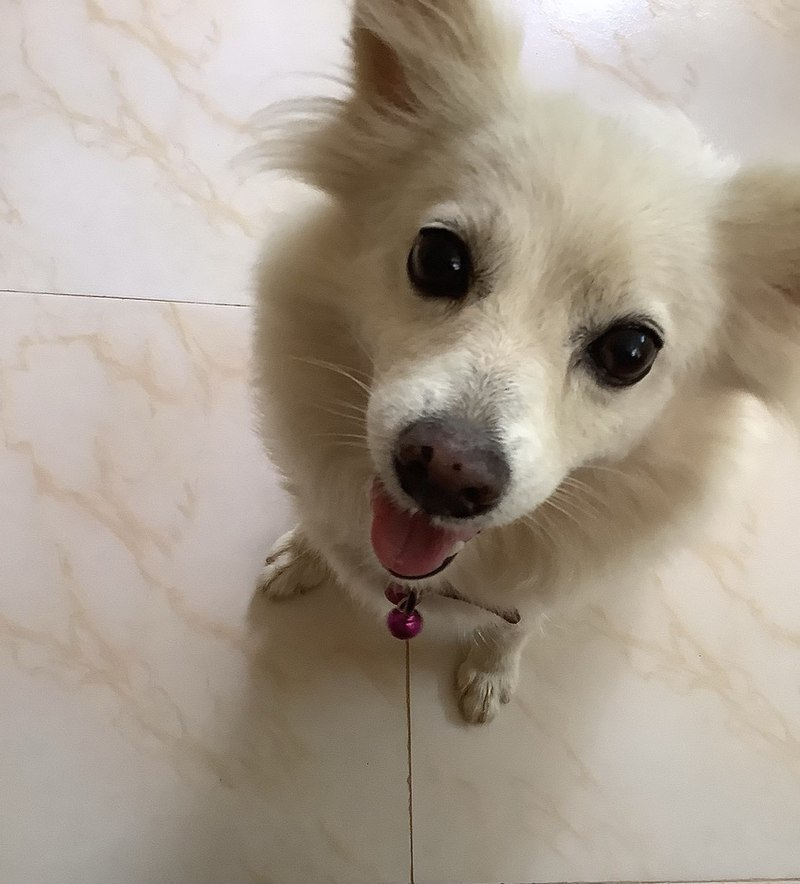

Dissimilaridade de Cosseno:  0.3621550276290768


In [ ]:
x = Image(filename='gato2.jpg',width=224)
y = Image(filename='cachorro1.jpg',width=224)
display(x, y)

d_cos = distance.cosine(gato2_embedding, cachorro1_embedding) # dissimilaridade de cosseno
print('Dissimilaridade de Cosseno: ',d_cos)

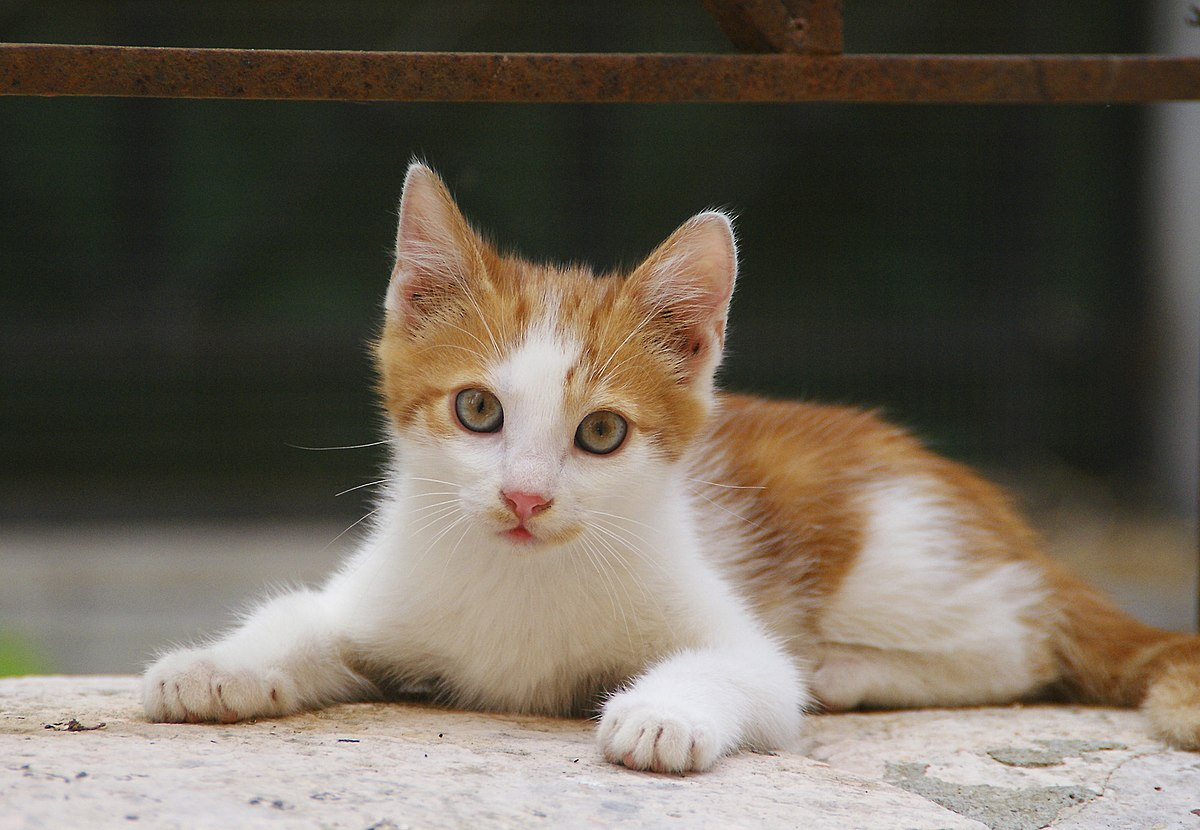

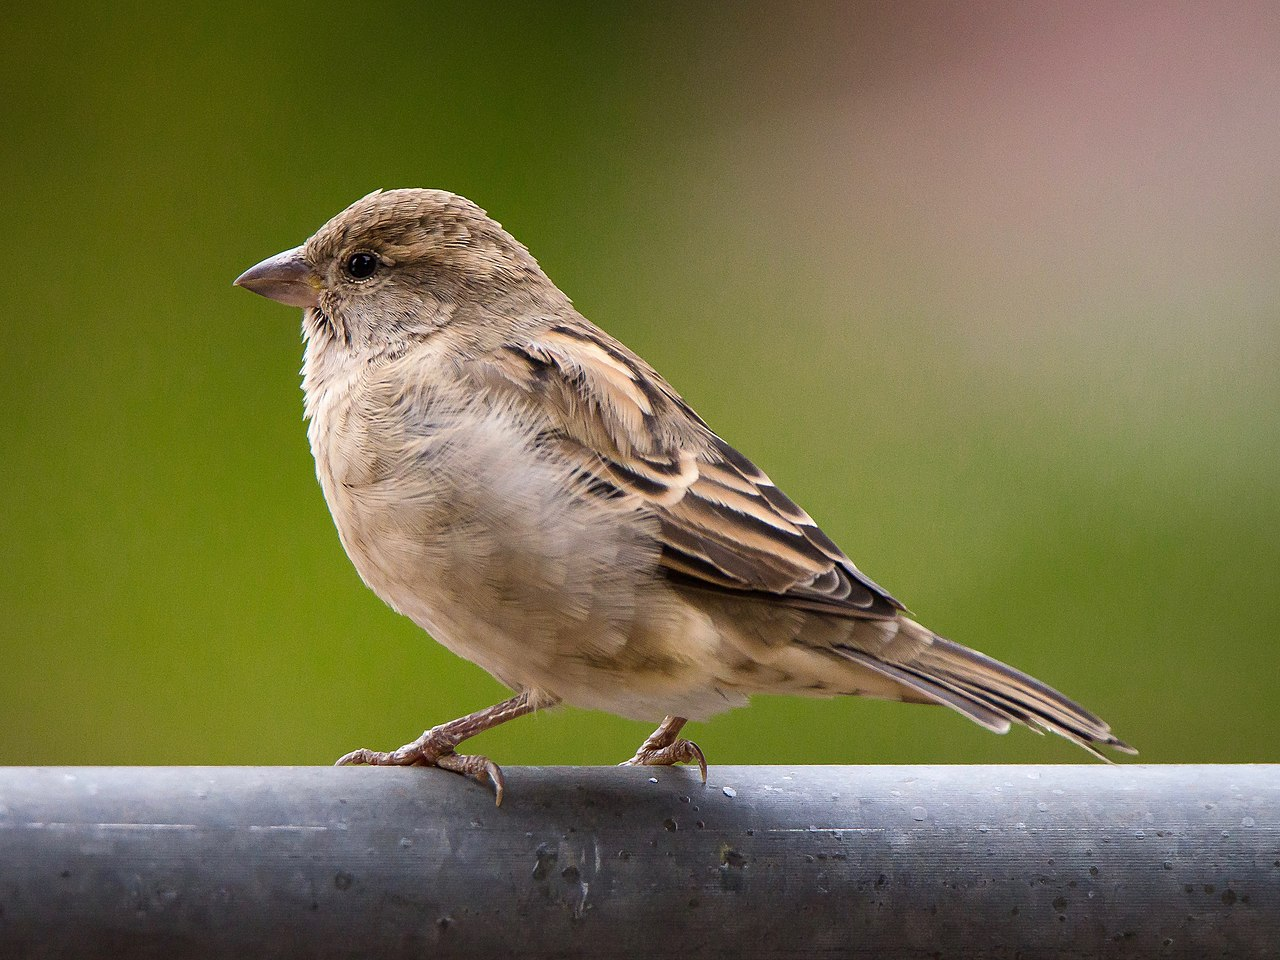

Dissimilaridade de Cosseno:  0.4309694256498974


In [ ]:
x = Image(filename='gato2.jpg',width=224)
y = Image(filename='passarinho.jpg',width=224)
display(x, y)

d_cos = distance.cosine(gato2_embedding, passarinho_embedding) # dissimilaridade de cosseno
print('Dissimilaridade de Cosseno: ',d_cos)

# Usando as embeddings em classificação

In [ ]:
!wget https://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip

--2024-10-11 11:50:12--  https://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.52.131.233
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135033638 (129M) [application/zip]
Saving to: ‘spatial_envelope_256x256_static_8outdoorcategories.zip’

spatial_envelope_25 100%[===================>] 128.78M  95.0MB/s    in 1.4s    

2024-10-11 11:50:13 (95.0 MB/s) - ‘spatial_envelope_256x256_static_8outdoorcategories.zip’ saved [135033638/135033638]



In [ ]:
!unzip spatial_envelope_256x256_static_8outdoorcategories.zip

Archive:  spatial_envelope_256x256_static_8outdoorcategories.zip
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_arnat59.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_art1130.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_art294.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_art487.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea1.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea10.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea14.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea2.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea20.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea24.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea26.jpg  
  inflating: spatial_envelope

In [ ]:
!rm spatial_envelope_256x256_static_8outdoorcategories/Thumbs.db

In [ ]:
from os import listdir
from os.path import isfile, join

dataset = 'spatial_envelope_256x256_static_8outdoorcategories/'

imagens = [f for f in listdir(dataset) if isfile(join(dataset, f)) and '.jpg' in f]
imagens



['insidecity_gre9.jpg',
 'coast_sun21.jpg',
 'insidecity_gre303.jpg',
 'mountain_n347078.jpg',
 'opencountry_n291048.jpg',
 'coast_natu822.jpg',
 'coast_nat643.jpg',
 'tallbuilding_urban16.jpg',
 'street_art766.jpg',
 'insidecity_urb464.jpg',
 'forest_cdmc284.jpg',
 'coast_nat908.jpg',
 'highway_bost290.jpg',
 'opencountry_n490067.jpg',
 'street_art1583.jpg',
 'coast_n291076.jpg',
 'opencountry_land276.jpg',
 'insidecity_hous36.jpg',
 'tallbuilding_urban1126.jpg',
 'forest_nat1088.jpg',
 'highway_nat520.jpg',
 'coast_natu649.jpg',
 'highway_gre658.jpg',
 'coast_natu642.jpg',
 'street_par94.jpg',
 'coast_land112.jpg',
 'forest_nat354.jpg',
 'mountain_land11.jpg',
 'highway_urb714.jpg',
 'highway_urb545.jpg',
 'opencountry_land691.jpg',
 'street_par155.jpg',
 'insidecity_hous39.jpg',
 'mountain_land30.jpg',
 'street_par99.jpg',
 'insidecity_a212024.jpg',
 'highway_gre685.jpg',
 'tallbuilding_urban1081.jpg',
 'insidecity_urb454.jpg',
 'mountain_n632073.jpg',
 'insidecity_a129048.jpg',
 'c

In [ ]:
from PIL import Image
from tqdm.notebook import tqdm
gerar_embeddings('spatial_envelope_256x256_static_8outdoorcategories/insidecity_gre446.jpg')

L = []
for imagem in tqdm(imagens):
  embedding = gerar_embeddings(dataset+imagem)
  L.append(embedding)

  0%|          | 0/2688 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
df_data = pd.DataFrame(imagens)
df_data['embeddings'] = L

L_label = []
for imagem in tqdm(imagens):
  label = imagem.split('_')[0]
  L_label.append(label)

df_data['label'] = L_label

  0%|          | 0/2688 [00:00<?, ?it/s]

In [ ]:
df_data

,0,embeddings,label
0,insidecity_gre9.jpg,"[0.034151744, 3.119158, 2.7080166, 0.32499862,...",insidecity
1,coast_sun21.jpg,"[0.09886659, 0.11193866, 0.0, 0.0, 1.205427, 0...",coast
2,insidecity_gre303.jpg,"[1.3608061, 3.4892097, 3.5883768, 0.19963397, ...",insidecity
3,mountain_n347078.jpg,"[0.059156243, 0.25215676, 0.16246314, 0.157293...",mountain
4,opencountry_n291048.jpg,"[0.101047926, 0.8289845, 0.24610098, 0.2179122...",opencountry
...,...,...,...
2683,street_a205062.jpg,"[1.0684162, 1.980161, 4.6152573, 0.68943155, 0...",street
2684,insidecity_art942.jpg,"[1.0692854, 1.5320077, 5.0856223, 0.38376707, ...",insidecity
2685,opencountry_natu864.jpg,"[0.563651, 0.013687252, 0.08969316, 0.7559983,...",opencountry
2686,coast_n603063.jpg,"[1.0169879, 0.007483136, 0.08492664, 1.3065655...",coast


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = np.array(df_data['embeddings'].to_list())
y = np.array(df_data['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)





In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)






KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import classification_report
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       coast       0.93      0.97      0.95       106
      forest       0.90      0.98      0.94       116
     highway       0.96      0.99      0.97        90
  insidecity       0.97      0.84      0.90       109
    mountain       0.93      0.96      0.95       117
 opencountry       0.93      0.78      0.85       134
      street       0.91      0.98      0.94        99
tallbuilding       0.94      0.98      0.96       117

    accuracy                           0.93       888
   macro avg       0.93      0.94      0.93       888
weighted avg       0.93      0.93      0.93       888

